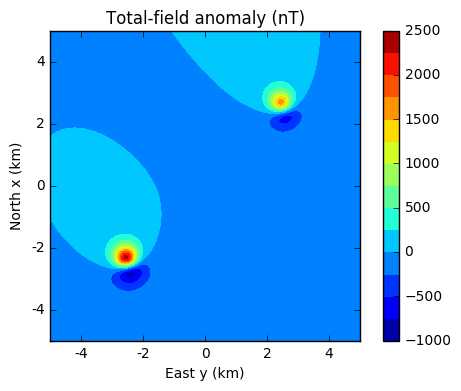

In [2]:
"""
GravMag: 3D forward modeling of total-field magnetic anomaly using oblate
ellipsoid (model with induced and remanent magnetization)
"""
from fatiando import mesher, gridder, utils
from fatiando.gravmag import ellipsoid_oblate
from fatiando.vis import mpl, myv

# The regional field
inten,inc, dec = 60000., 30, -15
bounds = [-5000, 5000, -5000, 5000, 0, 5000]
model = [mesher.EllipsoidOblate(-2500.,-2500.,0.,100.,200.,0.,0., 
                                 {'remanence': [10000, 90., 0.],
                                  'k': [0.2, 0.1, 0.05, 0., 90., 90.]}),
         mesher.EllipsoidOblate(2500.,2500.,0.,100.,200.,0.,0.,
                                 {'remanence': [5000, 90., 0.],
                                  'k': [0.2, 0.1, 0.05, 0., 90., 90.]})]
# Create a regular grid at 100m height
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=-500)
# Calculate the anomaly for a given regional field
tf = ellipsoid_oblate.tf_c(xp,yp,zp,inten,inc,dec,model)
# Plot
mpl.figure()
mpl.title("Total-field anomaly (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, tf, shape, 15)
mpl.colorbar()
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.m2km()
mpl.show()